# **Information about Data**

World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression
Data Preparation

#### Source
The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

#### Demographic:
• Sex: male or female(Nominal)
• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
Behavioral
• Current Smoker: whether or not the patient is a current smoker (Nominal)
• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
Medical( history)
• BP Meds: whether or not the patient was on blood pressure medication (Nominal)
• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
• Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)
• Tot Chol: total cholesterol level (Continuous)
• Sys BP: systolic blood pressure (Continuous)
• Dia BP: diastolic blood pressure (Continuous)
• BMI: Body Mass Index (Continuous)
• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
• Glucose: glucose level (Continuous)
Predict variable (desired target)
• 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)
#### Logistic Regression
Logistic regression is a type of regression analysis in statistics used for prediction of outcome of a categorical dependent variable from a set of predictor or independent variables. In logistic regression the dependent variable is always binary. Logistic regression is mainly used to for prediction and also calculating the probability of success.
The results above show some of the attributes with P value higher than the preferred alpha(5%) and thereby showing low statistically significant relationship with the probability of heart disease. Backward elimination approach is used here to remove those attributes with highest P-value one at a time followed by running the regression repeatedly until all attributes have P Values less than 0.05.
Feature Selection: Backward elimination (P-value approach)
Logistic regression equation
P=eβ0+β1X1/1+eβ0+β1X1P=eβ0+β1X1/1+eβ0+β1X1
When all features plugged in:
logit(p)=log(p/(1−p))=β0+β1∗Sexmale+β2∗age+β3∗cigsPerDay+β4∗totChol+β5∗sysBP+β6∗glucoselogit(p)=log(p/(1−p))=β0+β1∗Sexmale+β2∗age+β3∗cigsPerDay+β4∗totChol+β5∗sysBP+β6∗glucose

#### Interpreting the results: Odds Ratio, Confidence Intervals and P-values
• This fitted model shows that, holding all other features constant, the odds of getting diagnosed with heart disease for males (sex_male = 1)over that of females (sex_male = 0) is exp(0.5815) = 1.788687. In terms of percent change, we can say that the odds for males are 78.8% higher than the odds for females.
• The coefficient for age says that, holding all others constant, we will see 7% increase in the odds of getting diagnosed with CDH for a one year increase in age since exp(0.0655) = 1.067644.
• Similarly , with every extra cigarette one smokes thers is a 2% increase in the odds of CDH.
• For Total cholesterol level and glucose level there is no significant change.

• There is a 1.7% increase in odds for every unit increase in systolic Blood Pressure.

#### Model Evaluation - Statistics
From the above statistics it is clear that the model is highly specific than sensitive. The negative values are predicted more accurately than the positives.
Predicted probabilities of 0 (No Coronary Heart Disease) and 1 ( Coronary Heart Disease: Yes) for the test data with a default classification threshold of 0.5
lower the threshold
Since the model is predicting Heart disease too many type II errors is not advisable. A False Negative ( ignoring the probability of disease when there actually is one) is more dangerous than a False Positive in this case. Hence in order to increase the sensitivity, threshold can be lowered.

#### Conclusions
• All attributes selected after the elimination process show P-values lower than 5% and thereby suggesting significant role in the Heart disease prediction.

• Men seem to be more susceptible to heart disease than women. Increase in age, number of cigarettes smoked per day and systolic Blood Pressure also show increasing odds of having heart disease

• Total cholesterol shows no significant change in the odds of CHD. This could be due to the presence of 'good cholesterol(HDL) in the total cholesterol reading. Glucose too causes a very negligible change in odds (0.2%)

• The model predicted with 0.88 accuracy. The model is more specific than sensitive.

# **Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **DataFrame**

In [4]:
df = pd.read_csv('framingham.csv')

In [5]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# **EDA**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
male,4238.0,0.429212,0.495022,0.00,0.00,0.0,1.000,1.0
age,4238.0,49.584946,8.572160,32.00,42.00,49.0,56.000,70.0
education,4133.0,1.978950,1.019791,1.00,1.00,2.0,3.000,4.0
currentSmoker,4238.0,0.494101,0.500024,0.00,0.00,0.0,1.000,1.0
cigsPerDay,4209.0,9.003089,11.920094,0.00,0.00,0.0,20.000,70.0
BPMeds,4185.0,0.029630,0.169584,0.00,0.00,0.0,0.000,1.0
prevalentStroke,4238.0,0.005899,0.076587,0.00,0.00,0.0,0.000,1.0
prevalentHyp,4238.0,0.310524,0.462763,0.00,0.00,0.0,1.000,1.0
diabetes,4238.0,0.025720,0.158316,0.00,0.00,0.0,0.000,1.0
totChol,4188.0,236.721585,44.590334,107.00,206.00,234.0,263.000,696.0


In [8]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

# **Categorical Visualizations**

In [9]:
df['male'].value_counts()

0    2419
1    1819
Name: male, dtype: int64

<Axes: title={'center': 'Gender'}, xlabel='male', ylabel='count'>

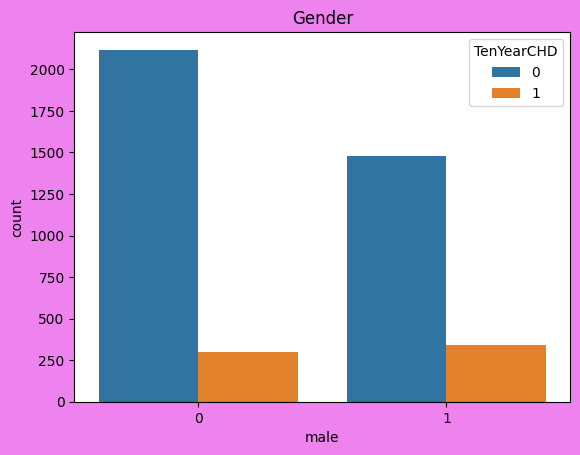

In [10]:
plt.figure(facecolor='violet')
plt.title('Gender')
sns.countplot(x='male',data=df,hue='TenYearCHD')

In [11]:
df['education'].value_counts()

1.0    1720
2.0    1253
3.0     687
4.0     473
Name: education, dtype: int64

<Axes: title={'center': 'Education'}, xlabel='education', ylabel='count'>

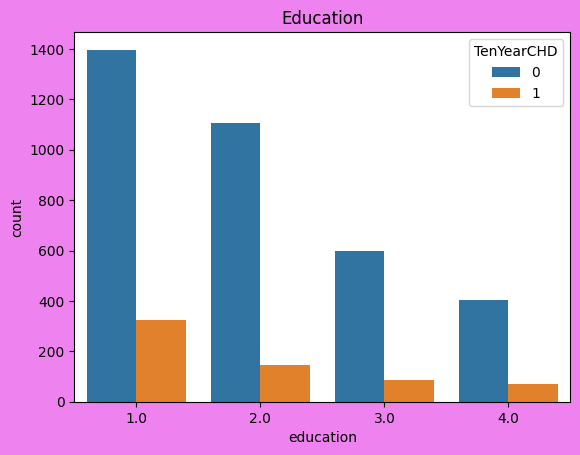

In [12]:
plt.figure(facecolor='violet')
plt.title('Education')
sns.countplot(x='education',data=df,hue='TenYearCHD')

In [13]:
df['currentSmoker'].value_counts()

0    2144
1    2094
Name: currentSmoker, dtype: int64

<Axes: title={'center': 'Smoker'}, xlabel='currentSmoker', ylabel='count'>

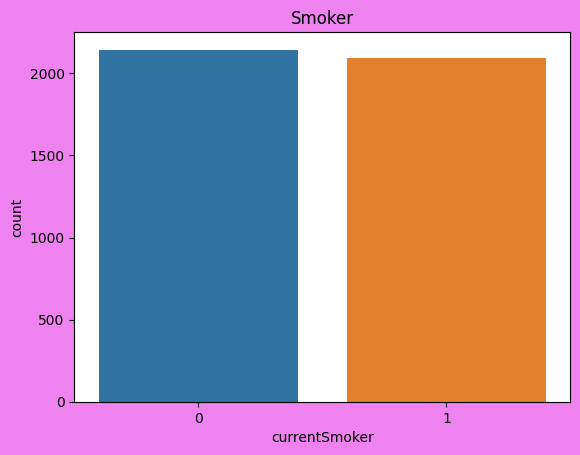

In [14]:
plt.figure(facecolor='violet')
plt.title('Smoker')
sns.countplot(x='currentSmoker',data=df)

In [15]:
df['BPMeds'].value_counts()

0.0    4061
1.0     124
Name: BPMeds, dtype: int64

<Axes: title={'center': 'BPMeds'}, xlabel='BPMeds', ylabel='count'>

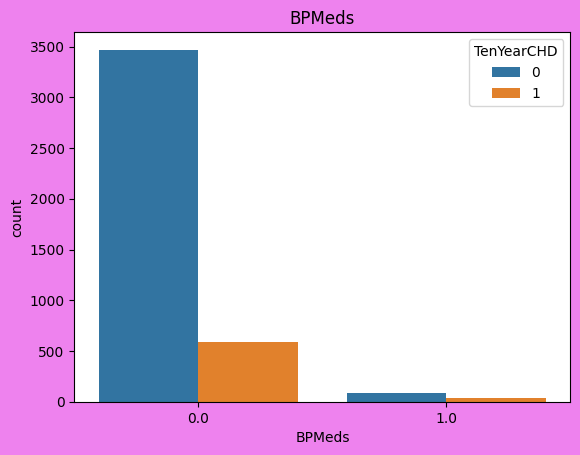

In [16]:
plt.figure(facecolor='violet')
plt.title('BPMeds')
sns.countplot(x='BPMeds',data=df,hue='TenYearCHD')

In [17]:
df['prevalentStroke'].value_counts()

0    4213
1      25
Name: prevalentStroke, dtype: int64

<Axes: title={'center': 'Prevalent Stroke'}, xlabel='prevalentStroke', ylabel='count'>

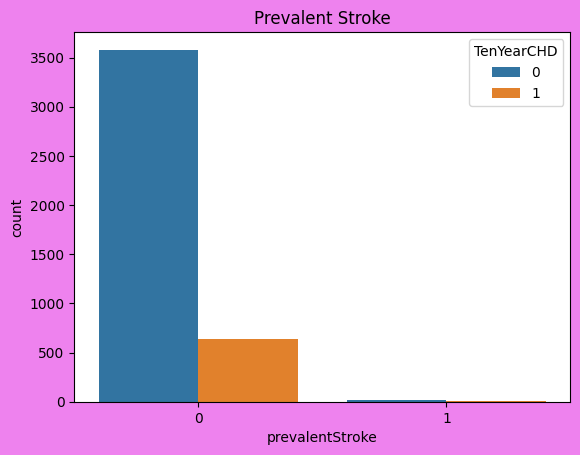

In [18]:
plt.figure(facecolor='violet')
plt.title('Prevalent Stroke')
sns.countplot(x='prevalentStroke',data=df,hue='TenYearCHD')

In [19]:
df['prevalentHyp'].value_counts()

0    2922
1    1316
Name: prevalentHyp, dtype: int64

<Axes: title={'center': 'Prevalent Hypertension'}, xlabel='prevalentHyp', ylabel='count'>

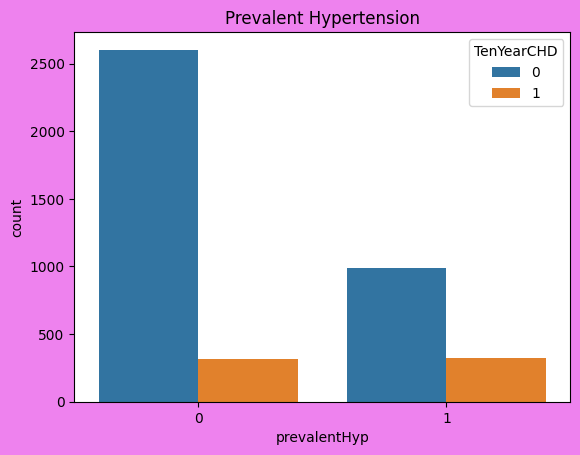

In [20]:
plt.figure(facecolor='violet')
plt.title('Prevalent Hypertension')
sns.countplot(x='prevalentHyp',data=df,hue='TenYearCHD')

In [21]:
df['diabetes'].value_counts()

0    4129
1     109
Name: diabetes, dtype: int64

<Axes: title={'center': 'Diabetes'}, xlabel='diabetes', ylabel='count'>

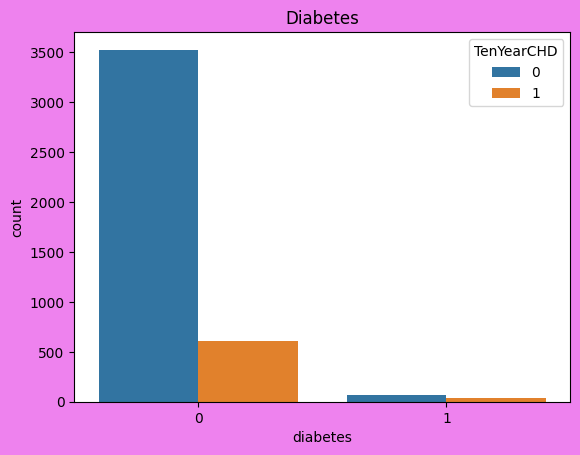

In [22]:
plt.figure(facecolor='violet')
plt.title('Diabetes')
sns.countplot(x='diabetes',data=df,hue='TenYearCHD')

In [23]:
df['TenYearCHD'].value_counts()

0    3594
1     644
Name: TenYearCHD, dtype: int64

<Axes: title={'center': 'TenYearCHD'}, ylabel='count'>

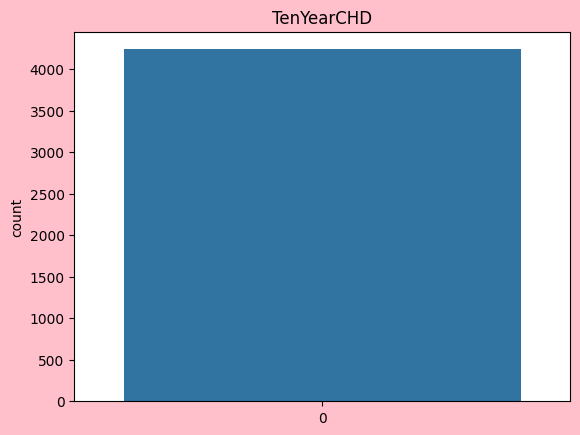

In [24]:
plt.figure(facecolor='Pink')
plt.title('TenYearCHD')
sns.countplot(df['TenYearCHD'])

# **Distributional plots**

In [25]:
df['age'].mean()

49.58494572911751

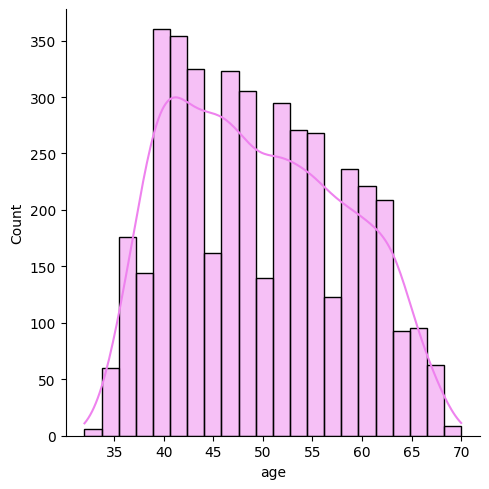

In [26]:
sns.displot(x='age',data=df,kde='True',color='violet')

In [27]:
df['cigsPerDay'].mean()

9.003088619624615

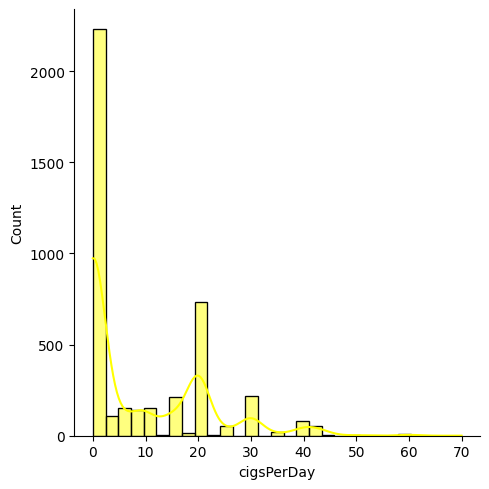

In [28]:
sns.displot(x='cigsPerDay',data=df,kde='True',color='yellow')

In [29]:
df['totChol'].mean()

236.72158548233045

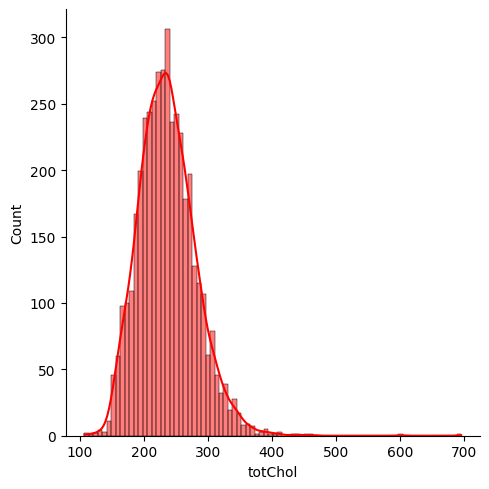

In [30]:
sns.displot(x='totChol',data=df,kde='True',color='red')

In [31]:
df['sysBP'].mean()

132.35240679565834

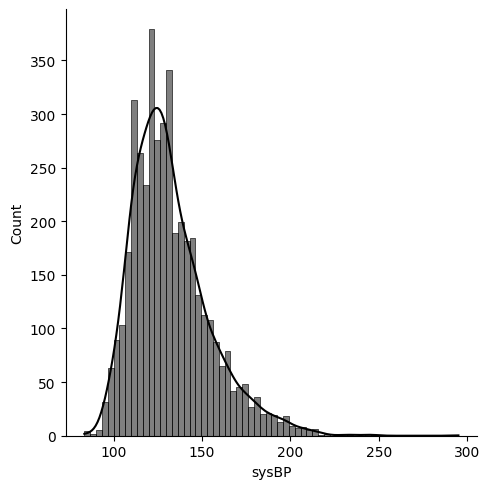

In [32]:
sns.displot(x='sysBP',data=df,kde='True',color='black')

In [33]:
df['diaBP'].mean()

82.89346389806512

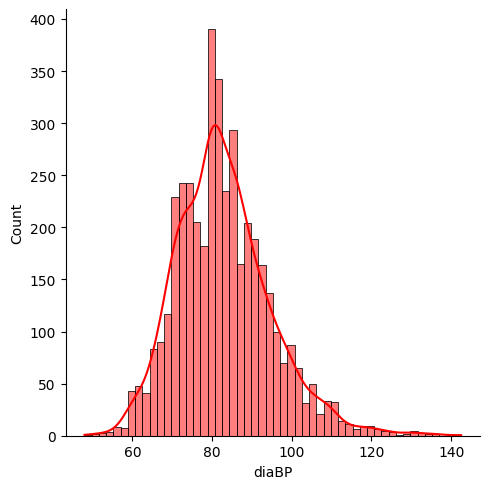

In [34]:
sns.displot(x='diaBP',data=df,kde='True',color='red')

In [35]:
df['BMI'].mean()

25.80200758473572

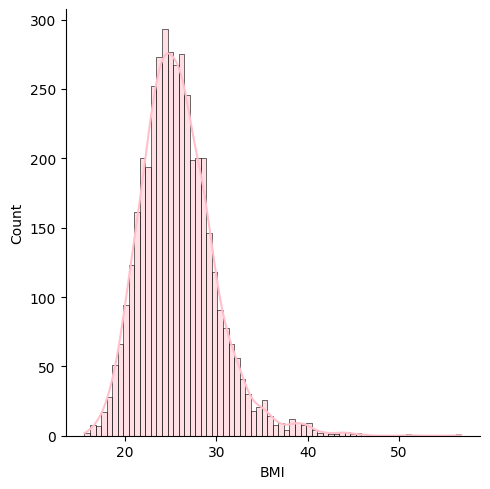

In [36]:
sns.displot(x='BMI',data=df,kde='True',color='pink')

In [37]:
df['heartRate'].mean()

75.87892376681614

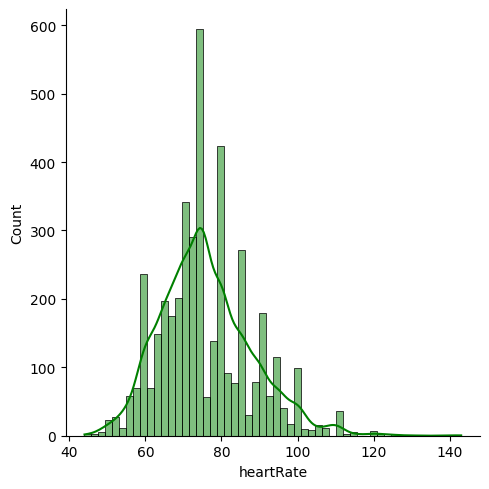

In [38]:
sns.displot(x='heartRate',data=df,kde='True',color='green')

In [39]:
df['glucose'].mean()

81.96675324675324

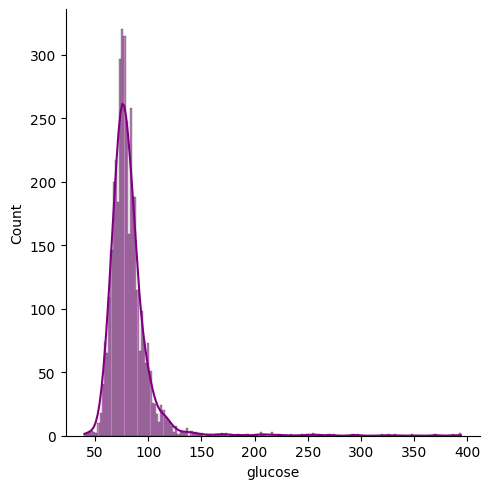

In [40]:
sns.displot(x='glucose',data=df,kde='True',color='purple')

In [41]:
df.corr()['TenYearCHD'][:-1].sort_values(ascending=False)

age                0.225256
sysBP              0.216429
prevalentHyp       0.177603
diaBP              0.145299
glucose            0.125544
diabetes           0.097317
male               0.088428
BPMeds             0.087489
totChol            0.082184
BMI                0.075192
prevalentStroke    0.061810
cigsPerDay         0.057884
heartRate          0.022913
currentSmoker      0.019456
education         -0.054059
Name: TenYearCHD, dtype: float64

# **Correlation**

<Axes: >

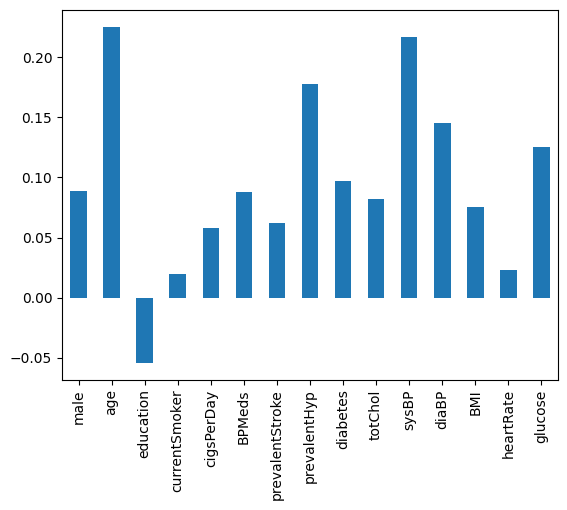

In [42]:
df.corr()['TenYearCHD'][:-1].plot(kind='bar')

<Axes: >

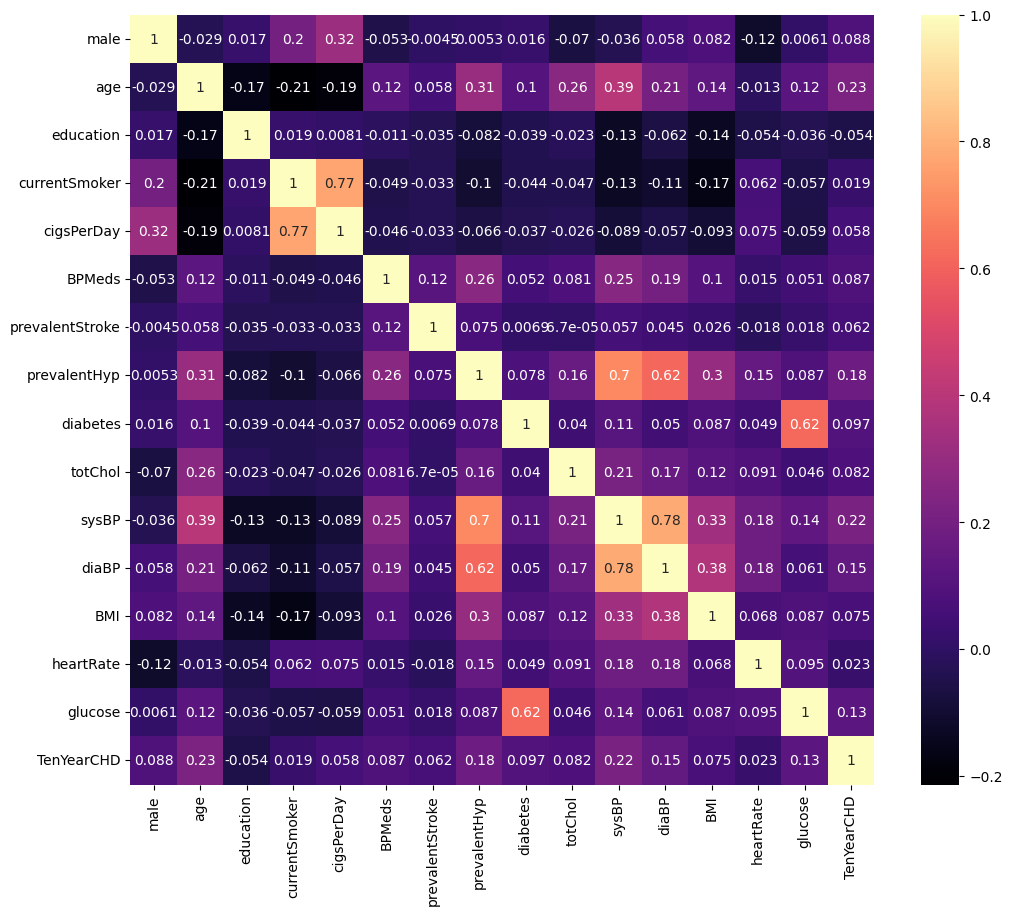

In [43]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap='magma')

<Axes: title={'center': 'sysBP vs diaBP'}, xlabel='diaBP', ylabel='sysBP'>

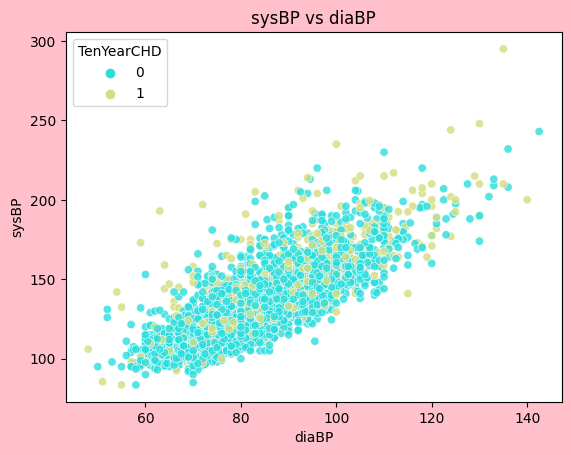

In [44]:
plt.figure(facecolor='Pink')
plt.title('sysBP vs diaBP')
sns.scatterplot(data=df,x='diaBP',y='sysBP',hue='TenYearCHD',alpha=0.8,palette='rainbow')

# **Dealing with Missing Data**

In [45]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [46]:
df['totChol'] = df['totChol'].fillna(value=df['totChol'].mean())

In [47]:
df['BMI'] = df['BMI'].fillna(value=df['BMI'].mean())

In [48]:
df['heartRate'] = df['heartRate'].fillna(value=df['heartRate'].mean())

In [49]:
df['cigsPerDay'] = df['cigsPerDay'].fillna(value=df['cigsPerDay'].mean())

In [50]:
df['glucose'] = df['glucose'].fillna(value=df['glucose'].mean())

In [51]:
df['BPMeds'] = df['BPMeds'].fillna(1)

In [52]:
df['education'] = df['education'].fillna(1)

In [53]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

# Splitting Data

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X = df.drop('TenYearCHD',axis=1)
y = df['TenYearCHD']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# **Scaling Data**

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
scaler = StandardScaler()

In [59]:
X_train = scaler.fit_transform(X_train)

In [60]:
X_test = scaler.transform(X_test)

# Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
logmodel = LogisticRegression()

In [63]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [64]:
predictions = logmodel.predict(X_test)

# **Evaluation**

In [65]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [66]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92      1097
           1       0.46      0.07      0.13       175

    accuracy                           0.86      1272
   macro avg       0.67      0.53      0.53      1272
weighted avg       0.81      0.86      0.81      1272



In [67]:
print(confusion_matrix(y_test,predictions))

[[1082   15]
 [ 162   13]]


In [68]:
print(accuracy_score(y_test,predictions))

0.8608490566037735


#### Any suggestions! give your feedback.